In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice as lattice
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator as ADP
from IPython.display import Markdown,display,Image
def printgras(string):
    display(Markdown(string))

printgras('**Téléchargement du dossier cif**')
with MPRester("MioTRFvNPal5mnDV") as m:
    structure = m.get_structure_by_material_id("mp-754777")
    structure2 = SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    w = CifWriter(structure2)
    w.write_file('mystructure4.cif')

**Téléchargement du dossier cif**

**Calcul du spectre d'absorption de la structure**

Diffractogramme de la structure


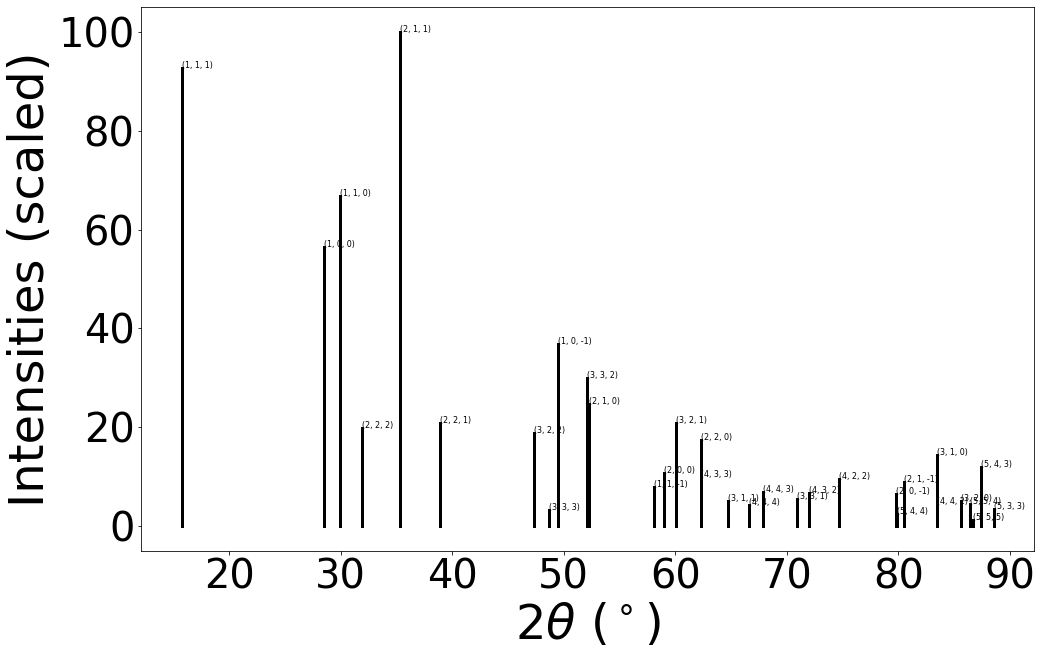

In [14]:
printgras("**Calcul du spectre d'absorption de la structure**")
print('Diffractogramme de la structure')
calcul = XRDCalculator() #création de l'objet XRDcalculator (longueur d'onde par défaut = CuKa)
diffpatt = calcul.get_pattern(structure2, scaled = True, two_theta_range=(0, 90)) #Calcule les pics de diffraction
calcul.get_plot(structure2, two_theta_range=(0, 90), annotate_peaks=True, ax=None, with_labels=True, fontsize=8)
plt.show()

In [16]:
printgras("**Valeurs des 3 premiers pics d'asborption**")
print('Premier pic')
print('Intensité :', (diffpatt.y)[0])
print('2\u03B8 :', (diffpatt.x)[0])
print('Indices hkl :', (diffpatt.hkls)[0]) #Indices de Miller de toutes les facettes diffractées du réseau participant pour cette intensité
print('Distance entre les plans d :', (diffpatt.d_hkls)[0])

**Valeurs des 3 premiers pics d'asborption**

Premier pic
Intensité : 92.61878379072981
2θ : 15.783791193946058
Indices hkl : [{'hkl': (1, 1, 1), 'multiplicity': 2}]
Distance entre les plans d : 5.614676466680627


In [17]:
print('Deuxième pic')
print('Intensité :', (diffpatt.y)[1])
print('2\u03B8 :', (diffpatt.x)[1])
print('Indices hkl :', (diffpatt.hkls)[1])
print('Distance entre les plans d :', (diffpatt.d_hkls)[1])

Deuxième pic
Intensité : 56.520571724552156
2θ : 28.490021519215475
Indices hkl : [{'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance entre les plans d : 3.1329437515146346


In [18]:
print('Troisième pic')
print('Intensité :', (diffpatt.y)[2])
print('2\u03B8 :', (diffpatt.x)[2])
print('Indices hkl :', (diffpatt.hkls)[2])
print('Distance entre les plans d :', (diffpatt.d_hkls)[2])

Troisième pic
Intensité : 66.84068749905387
2θ : 29.964863950215296
Indices hkl : [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance entre les plans d : 2.982018678616687


**Diffractogramme des 3 premiers pics d'absorption**

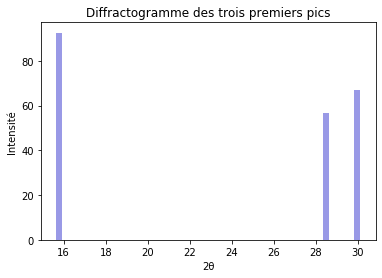

In [19]:
printgras("**Diffractogramme des 3 premiers pics d'absorption**")
xaxis = [(diffpatt.x)[0],(diffpatt.x)[1],(diffpatt.x)[2]] #axe x du diffractogramme à 3 pics
yaxis = [(diffpatt.y)[0],(diffpatt.y)[1],(diffpatt.y)[2]] #axe y du diffractogramme à 3 pics
width = 0.3
plt.bar(xaxis, yaxis, width, color=(0.6, 0.6, 0.9 ,1.0)) #diffractogramme à 3 pics
plt.xlabel('2\u03B8')
plt.ylabel('Intensité')
plt.title('Diffractogramme des trois premiers pics')
plt.show()